### **1. Análise Exploratória dos Dados**
Nesta seção, foi realizada uma análise inicial para entender a distribuição das variáveis e identificar relações entre as variáveis independentes e a variável alvo (`Compra`).

**Incluído:**
- Distribuição das variáveis.
- Identificação de valores ausentes ou inconsistências.
- Visualização de correlações.

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Dataset.csv')
df

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,29.0,30000.0,Feminino,5.741706,Não,0
1,58.0,50000.0,Feminino,21.885505,Sim,0
2,50.0,70000.0,Feminino,6.121339,Não,1
3,21.0,100000.0,Feminino,16.264925,Não,0
4,59.0,50000.0,Feminino,28.235667,Sim,1
...,...,...,...,...,...,...
195,19.0,30000.0,Masculino,29.390255,NaN,1
196,NaN,50000.0,Feminino,21.024302,Sim,0
197,54.0,30000.0,Feminino,25.562014,Não,1
198,22.0,50000.0,NaN,8.313117,Não,0


<p>Conferindo o tipo de cada coluna </p>

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Idade                190 non-null    float64
 1   Renda Anual (em $)   189 non-null    float64
 2   Gênero               193 non-null    object 
 3   Tempo no Site (min)  200 non-null    float64
 4   Anúncio Clicado      190 non-null    object 
 5   Compra (0 ou 1)      200 non-null    int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 9.5+ KB


<p>Conferindo valores inconsistentes </p>

In [190]:
valores_ausentes = df.isnull().sum()
valores_ausentes

Idade                  10
Renda Anual (em $)     11
Gênero                  7
Tempo no Site (min)     0
Anúncio Clicado        10
Compra (0 ou 1)         0
dtype: int64

Nessa parte, foi feita a mediana da coluna: 'Idade' e 'Renda Anual'

In [191]:
df['Idade'].fillna(df['Idade'].median(), inplace=True)
df['Renda Anual (em $)'].fillna(df['Renda Anual (em $)'].median(), inplace=True)

C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\3727900321.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Idade'].fillna(df['Idade'].median(), inplace=True)
C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\3727900321.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

Nessa parte, foi feita a moda da coluna 'Anúncio clicado' e 'Gênero'

In [192]:
df['Anúncio Clicado'].fillna(df['Anúncio Clicado'].mode()[0], inplace=True)
df['Gênero'].fillna(df['Gênero'].mode()[0], inplace=True)

C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\2472679251.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Anúncio Clicado'].fillna(df['Anúncio Clicado'].mode()[0], inplace=True)
C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\2472679251.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are settin

Filtrando dados em que o 'Tempo no Site (min)' ficou negativo

In [193]:
df[df['Tempo no Site (min)'] < 0]

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
107,38.0,50000.0,Masculino,-1.0,Sim,0
116,40.0,30000.0,Masculino,-1.0,Sim,0
132,38.0,50000.0,Masculino,-1.0,Sim,0
133,20.0,50000.0,Masculino,-1.0,Sim,0
147,54.0,70000.0,Masculino,-1.0,Sim,1


Calculando a mediana 'Tempo no Site (min)' (considerando apenas valores válidos)

In [194]:

mediana_tempo = df.loc[df['Tempo no Site (min)'] >= 0, 'Tempo no Site (min)'].median()
df['Tempo no Site (min)'] = df['Tempo no Site (min)'].apply(lambda x: mediana_tempo if x < 0 else x)


Verificando se ainda possui dados ausentes 

In [195]:
valores_atualizados = df.isnull().sum()
valores_atualizados 

Idade                  0
Renda Anual (em $)     0
Gênero                 0
Tempo no Site (min)    0
Anúncio Clicado        0
Compra (0 ou 1)        0
dtype: int64

In [196]:
df['Compra (0 ou 1)'].value_counts()

Compra (0 ou 1)
0    134
1     66
Name: count, dtype: int64

### **2. Visualização dos Dados**
- Tirar insights sobre sobre os gráficos 
- Identificar a correlação das variáveis numéricas e categoricas 

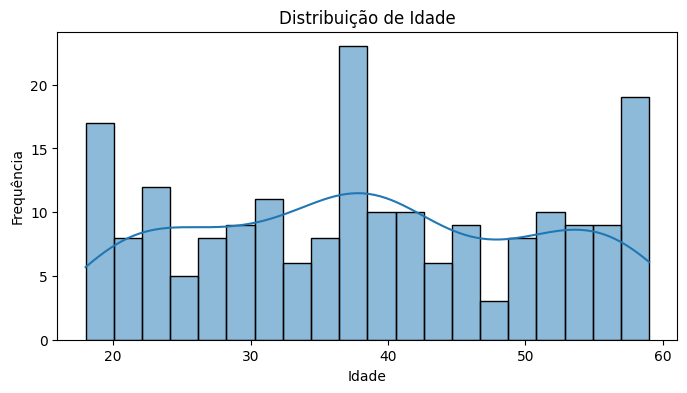

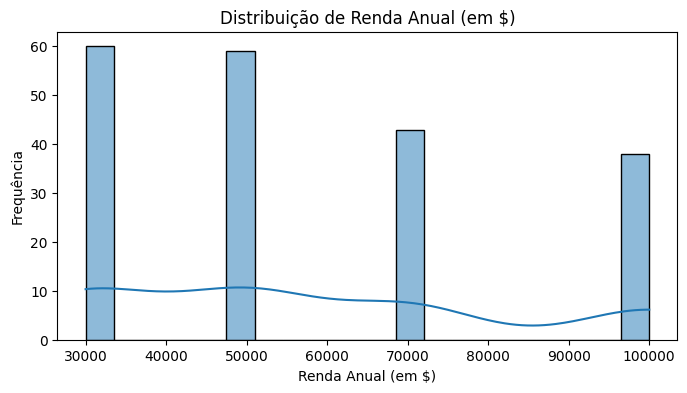

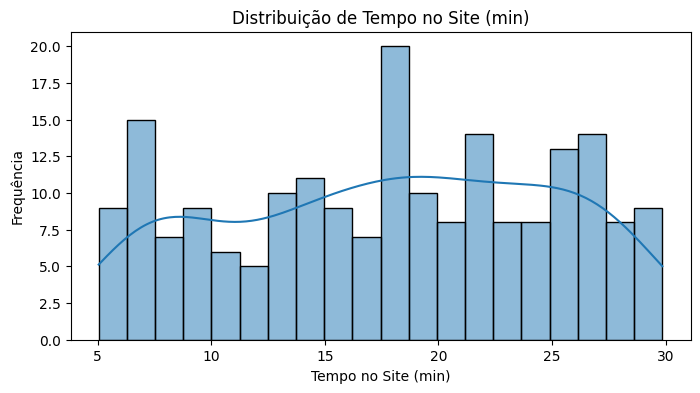

In [197]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variáveis numéricas
variaveis_numericas = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']

for coluna in variaveis_numericas:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[coluna], kde=True, bins=20)
    plt.title(f'Distribuição de {coluna}')
    plt.xlabel(coluna)
    plt.ylabel('Frequência')
    plt.show()


C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\1565523479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[coluna], palette= cores)


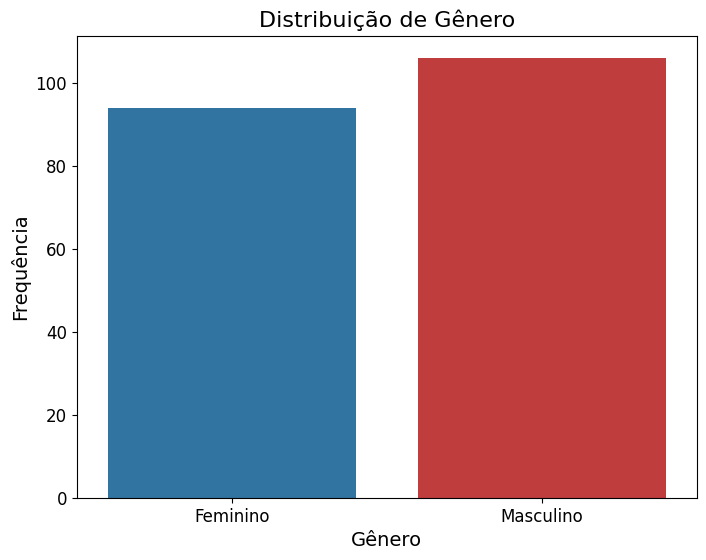


Frequências para Gênero:
Gênero
Masculino    106
Feminino      94
Name: count, dtype: int64

Frequências para Anúncio Clicado:
Anúncio Clicado
Sim    117
Não     83
Name: count, dtype: int64


C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\1565523479.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df[coluna], palette= cores)


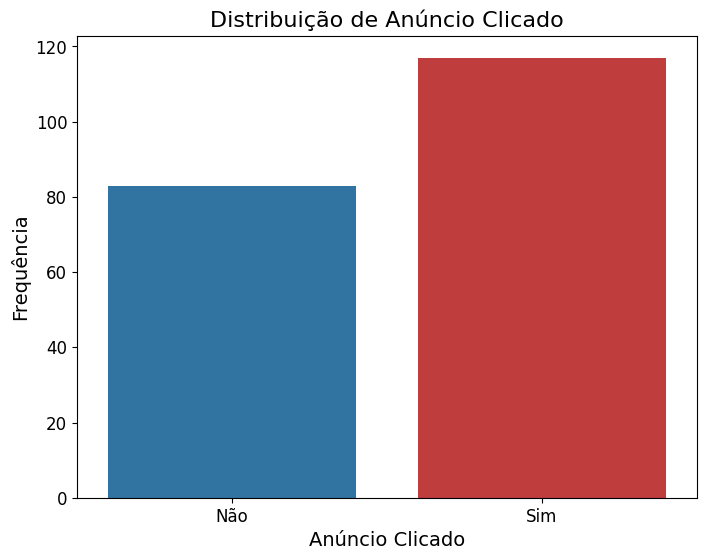


Frequências para Gênero:
Gênero
Masculino    106
Feminino      94
Name: count, dtype: int64

Frequências para Anúncio Clicado:
Anúncio Clicado
Sim    117
Não     83
Name: count, dtype: int64


In [198]:
variaveis_categoricas = ['Gênero', 'Anúncio Clicado']
cores = ['#1f77b4','#d62728']

for coluna in variaveis_categoricas:
    plt.figure(figsize=(8, 6))  
    ax = sns.countplot(x=df[coluna], palette= cores)  
    
    plt.title(f'Distribuição de {coluna}', fontsize=16)
    plt.xlabel(coluna, fontsize=14)
    plt.ylabel('Frequência', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()

    for coluna in variaveis_categoricas:
        print(f"\nFrequências para {coluna}:")
        print(df[coluna].value_counts())



In [199]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Idade,200.0,38.48,12.36,18.00,28.75,38.00,50.00,59.00
Renda Anual (em $),200.0,57800.00,24965.50,30000.00,30000.00,50000.00,70000.00,100000.00
Tempo no Site (min),200.0,17.83,7.14,5.05,12.28,18.31,23.89,29.85
Compra (0 ou 1),200.0,0.33,0.47,0.00,0.00,0.00,1.00,1.00


C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\2083749106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Compra (0 ou 1)'], y=df[coluna], palette='viridis')


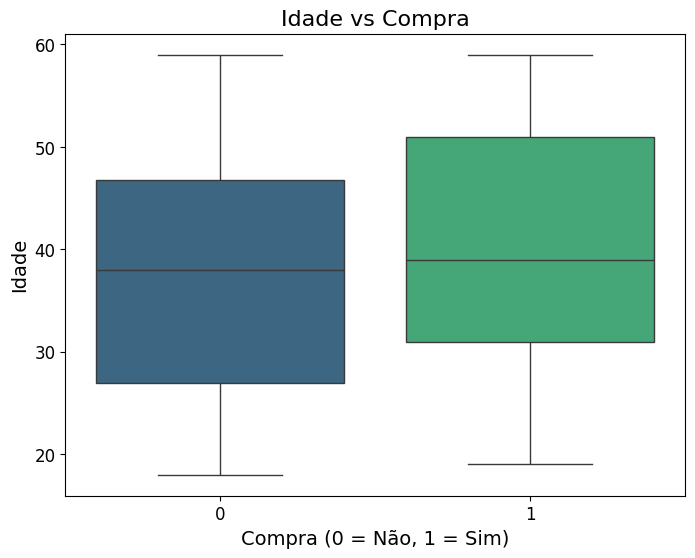

C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\2083749106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Compra (0 ou 1)'], y=df[coluna], palette='viridis')


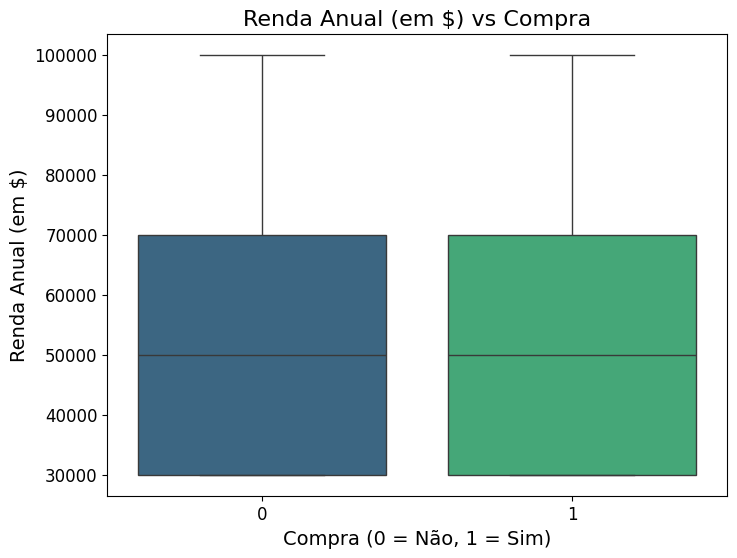

C:\Users\Yvens Almeida\AppData\Local\Temp\ipykernel_15032\2083749106.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['Compra (0 ou 1)'], y=df[coluna], palette='viridis')


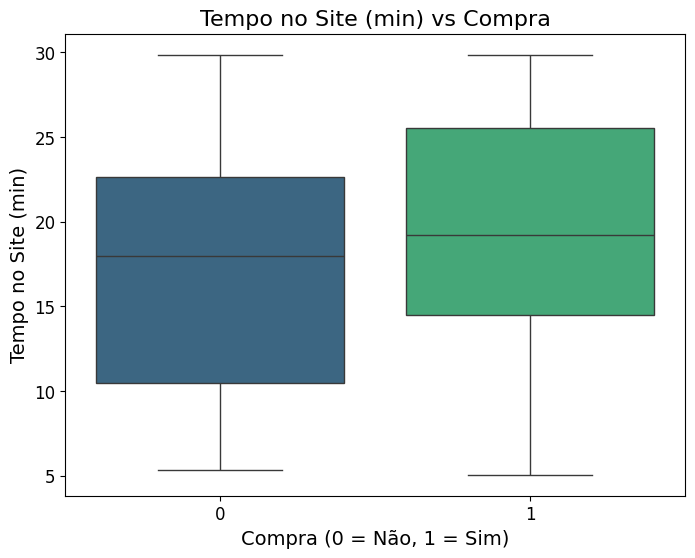

In [200]:
# Relação entre variáveis numéricas e a variável alvo
variaveis_numericas = ['Idade', 'Renda Anual (em $)', 'Tempo no Site (min)']


for coluna in variaveis_numericas:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df['Compra (0 ou 1)'], y=df[coluna], palette='viridis')
    plt.title(f'{coluna} vs Compra', fontsize=16)
    plt.xlabel('Compra (0 = Não, 1 = Sim)', fontsize=14)
    plt.ylabel(coluna, fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


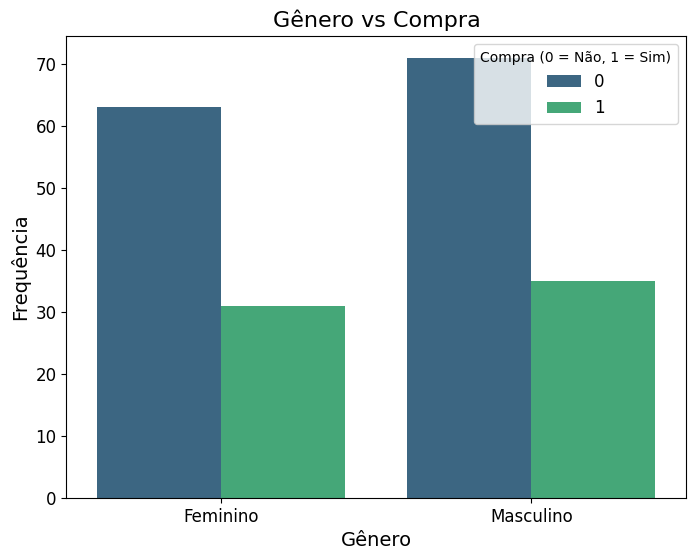

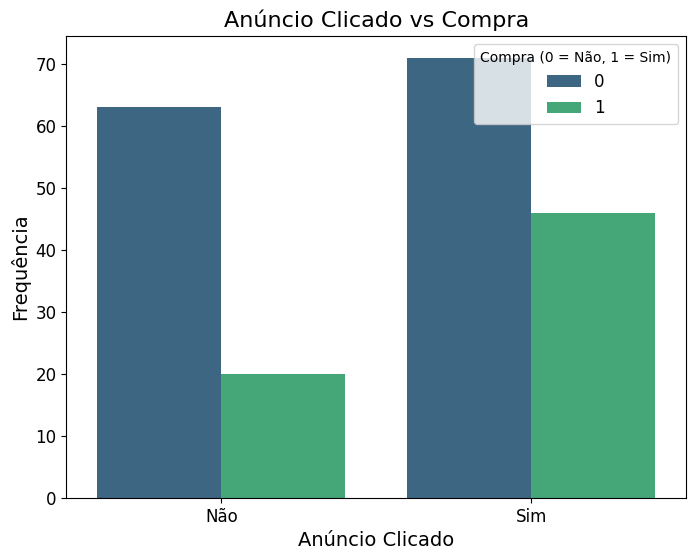

In [201]:
# Relação entre variáveis categóricas e a variável alvo
variaveis_categoricas = ['Gênero', 'Anúncio Clicado']

for coluna in variaveis_categoricas:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=df[coluna], hue=df['Compra (0 ou 1)'], palette='viridis')
    plt.title(f'{coluna} vs Compra', fontsize=16)
    plt.xlabel(coluna, fontsize=14)
    plt.ylabel('Frequência', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(title='Compra (0 = Não, 1 = Sim)', fontsize=12)
    plt.show()


### **3. Pré-processamento dos Dados**
Para preparar os dados para o modelo, realizamos:
- Normalização das variáveis numéricas.
- Codificação das variáveis categóricas.
- Divisão dos dados em conjuntos de treino e teste.

In [202]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[variaveis_numericas] = scaler.fit_transform(df[variaveis_numericas])
df[variaveis_numericas]

,Idade,Renda Anual (em $),Tempo no Site (min)
0,0.268293,0.000000,0.027786
1,0.975610,0.285714,0.678722
2,0.780488,0.571429,0.043093
3,0.073171,1.000000,0.452094
4,1.000000,0.285714,0.934768
...,...,...,...
195,0.024390,0.000000,0.981322
196,0.487805,0.285714,0.643997
197,0.878049,0.000000,0.826963
198,0.097561,0.285714,0.131468


In [203]:
from sklearn.preprocessing import LabelEncoder

label_encoder_genero = LabelEncoder()
df['Gênero'] = label_encoder_genero.fit_transform(df['Gênero'])

label_encoder_anuncio = LabelEncoder()
df['Anúncio Clicado'] = label_encoder_anuncio.fit_transform(df['Anúncio Clicado'])

df[variaveis_categoricas]

,Gênero,Anúncio Clicado
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1
...,...,...
195,1,1
196,0,1
197,0,0
198,1,0


In [204]:
print(f"Mapeamento de Gênero:", dict(enumerate(label_encoder_genero.classes_)))
print(f"Mapeamento de Anúncio Clicado:", dict(enumerate(label_encoder_anuncio.classes_)))

Mapeamento de Gênero: {0: 'Feminino', 1: 'Masculino'}
Mapeamento de Anúncio Clicado: {0: 'Não', 1: 'Sim'}


In [205]:
df

,Idade,Renda Anual (em $),Gênero,Tempo no Site (min),Anúncio Clicado,Compra (0 ou 1)
0,0.268293,0.000000,0,0.027786,0,0
1,0.975610,0.285714,0,0.678722,1,0
2,0.780488,0.571429,0,0.043093,0,1
3,0.073171,1.000000,0,0.452094,0,0
4,1.000000,0.285714,0,0.934768,1,1
...,...,...,...,...,...,...
195,0.024390,0.000000,1,0.981322,1,1
196,0.487805,0.285714,0,0.643997,1,0
197,0.878049,0.000000,0,0.826963,0,1
198,0.097561,0.285714,1,0.131468,0,0


In [206]:
from sklearn.model_selection import train_test_split

target = 'Compra (0 ou 1)'

X = df.drop(columns=['Compra (0 ou 1)'])
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape


((140, 5), (60, 5), (140,), (60,))

In [207]:
from sklearn.linear_model import LogisticRegression

# 3. Inicialização e treinamento do modelo
modelo = LogisticRegression(random_state=42)  # Inicializando o modelo de Regressão Logística
modelo.fit(X_train, y_train)  # Treinando o modelo com os dados de treino


LogisticRegression(random_state=42)

In [208]:
y_pred = modelo.predict(X_test)
y_pred.shape

(60,)

### **4. Construção do Modelo (péssimo desempenho)**
Treinamos um modelo de Regressão Logística para prever a variável alvo, porém, teve um péssimo desempenho. O modelo foi avaliado utilizando:
- Acurácia.
- Matriz de confusão.
- Relatório de classificação.

In [209]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(class_report)

Acurácia: 0.58
Matriz de Confusão:
[[35  0]
 [25  0]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.58      1.00      0.74        35
           1       0.00      0.00      0.00        25

    accuracy                           0.58        60
   macro avg       0.29      0.50      0.37        60
weighted avg       0.34      0.58      0.43        60



c:\Users\Yvens Almeida\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yvens Almeida\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Yvens Almeida\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

### **5. Interpretação dos Resultados antes de balancear os dados e melhorar o desempenho do modelo**
Analisamos os coeficientes do modelo para entender quais variáveis tiveram maior impacto na predição. Os resultados indicaram que:
- `Idade` teve o maior coeficiente.
- `Anúncio Clicado` também foi uma variável significativa.<br>
A partir desses coeficientes obtidos, mostra-se que não faz sentido algum a variável 'idade' ter uma prioridade maior do que a variavel 'tempo no site.'

In [210]:
import numpy as np
# Extraindo os coeficientes
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': modelo.coef_[0],
    'Abs_Coefficient': np.abs(modelo.coef_[0])
})

# Ordenando pela magnitude
coeficientes = coeficientes.sort_values(by='Abs_Coefficient', ascending=False)

coeficientes

,Feature,Coefficient,Abs_Coefficient
0,Idade,0.687748,0.687748
4,Anúncio Clicado,0.389312,0.389312
3,Tempo no Site (min),0.375076,0.375076
1,Renda Anual (em $),0.230537,0.230537
2,Gênero,0.138325,0.138325


### **6. Construção do Modelo utilizando balanceamento de dados (melhor desempenho comparado ao primeiro)**
Treinamos um modelo de Regressão Logística para prever a variável alvo. O modelo foi avaliado utilizando:
- Acurácia
- Matriz de confusão.
- Relatório de classificação.

In [211]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Distribuição após SMOTE: {pd.Series(y_resampled).value_counts()}")


Distribuição após SMOTE: Compra (0 ou 1)
0    134
1    134
Name: count, dtype: int64


In [212]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [213]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(random_state=42)
modelo.fit(X_train, y_train)


LogisticRegression(random_state=42)

In [214]:

# Previsões
y_pred = modelo.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Acurácia: {accuracy:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)
print("Relatório de Classificação:")
print(classification_rep)


Acurácia: 0.69
Matriz de Confusão:
[[17 14]
 [ 3 20]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.85      0.55      0.67        31
           1       0.59      0.87      0.70        23

    accuracy                           0.69        54
   macro avg       0.72      0.71      0.68        54
weighted avg       0.74      0.69      0.68        54



### **7. Interpretação dos Resultados**
Analisamos os coeficientes do modelo para entender quais variáveis tiveram maior impacto na predição. Os resultados indicaram que:
- `Tempo no Site` teve o maior coeficiente.
- `Anúncio Clicado` também foi uma variável significativa.

In [215]:
import numpy as np
# Extraindo os coeficientes
coeficientes = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': modelo.coef_[0],
    'Abs_Coefficient': np.abs(modelo.coef_[0])
})

# Ordenando pela magnitude
coeficientes = coeficientes.sort_values(by='Abs_Coefficient', ascending=False)

coeficientes

,Feature,Coefficient,Abs_Coefficient
3,Tempo no Site (min),1.010686,1.010686
4,Anúncio Clicado,0.608446,0.608446
0,Idade,0.369455,0.369455
1,Renda Anual (em $),-0.229817,0.229817
2,Gênero,-0.094900,0.094900


### **8. Resultados e Conclusões**
Os principais resultados obtidos foram:
- Acurácia do modelo: **0.69**.
- Boas métricas de precisão e recall para a classe `Compra = 1`.
